# Latar Belakang
TSA (Transportation Security Agent) merupakan sebuah badan pemerintah Amerika Serikat yang yang memiliki fokus utama dalam kemanan bandara. TSA bertanggung jawab untuk pemeriksaan penumpang dan bagasi di lebih dari 450 bandara Amerika Serikat. TSA mencatat klaim yang diajukan oleh para penumpang pesawat seperti kehilangan ataupun kerusakan barang. Data klaim yang diajukan kepada TSA tersebut dapat digunakan oleh TSA sebagai acuan untuk terus dapat meningkatkan kinerja keamanan di bandara.


# Pernyataan Masalah
TSA ingin melakukan evaluasi terkait keamanan bandara. TSA ingin mengetahui perkembangan jumlah klaim yang diterima, bandara mana saja yang memiliki jumlah klaim terbanyak serta jenis klaim apa yang paling banyak dilaporkan oleh penumpang. Informasi ini akan membantu TSA untuk mengetahui bandara mana saja yang membutuhkan peningkatan sistem keamanan sehingga dapat mengurangi jumlah klaim yang diajukan oleh penumpang pada TSA. 

Sebagai seorang *data analyst*, saya akan menyelesaikan masalah:

* Bagaimana perkembangan jumlah klaim penumpang pada rentang tahun 2002-2015?
* Bandara apa yang menerima jumlah klaim paling banyak?
* Jenis klaim apa yang paling banyak dilaporkan?
* Titik lokasi apa yang paling banyak menerima laporan klaim?

Untuk menyelesaikan masalah di atas, dibuat beberapa tujuan yaitu:
* Mengetahui perkembangan jumlah klaim penumpang pada rentang tahun 2002-2015
* Mengetahui bandara mana yang memiliki jumlah klaim paling banyak
* Mengetahui jenis klaim yang paling banyak dilaporkan
* Mengetahui titik lokasi yang paling banyak menerima laporan klaim

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Dataset ini terdiri dari 13 kolom yaitu : 

* Claim Number : Nomor unik dari setiap klaim yamg diajukan penumpang
* Date Received : Tanggal diterimanya pengajuan klaim dari penumpang oleh TSA
* Incident Date : Tanggal kejadian atau kasus yang dialami oleh penumpang
* Airport Code : Kode bandara
* Airport Name : Nama Bandara
* Airline Name : Nama maskapai penerbangan
* Claim Type : Jenis klaim yang diajukan penumpang
* Claim Site : Tempat/lokasi pengajuan klaim
* Item : Jenis dari item dalam klaim yang diajukan penumpang
* Claim Amount : Harga dari klaim (ganti rugi) yang diajukan penumpang (dalam dollar)
* Status : Status dari klaim yang diajukan penumpang
* Close Amount : Harga klaim yang dibayarkan oleh TSA (dalam dollar)
* Disposition : Disposisi terhadap klaim yang telah diajukan penumpang



Berikut lima baris teratas dan lima baris terbawah dari dataset tsa_claims.

In [2]:
df = pd.read_csv('tsa_claims.csv')
display(df.head(),df.tail())

C:\Users\haqib\AppData\Local\Temp\ipykernel_27580\1558201155.py:1: DtypeWarning: Columns (0,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('tsa_claims.csv')


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
204262,2015120427297,20-Nov-15,16-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,-,-,NaN,NaN
204263,2015123027969,17-Dec-15,2-Dec-15,-,-,-,Property Damage,Checked Baggage,Audio/Video; Home Decor,-,-,NaN,NaN
204264,2016010428072,22-Dec-15,20-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN
204265,2016011328300,30-Dec-15,28-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,-,-,NaN,NaN
204266,2015123128015,31-Dec-15,23-Nov-15,-,-,-,Passenger Property Loss,Checkpoint,Personal Accessories,-,-,NaN,NaN


# Data Understanding and Cleaning
Sebelum masuk ke dalam tahap analisis, perlu dilakukan terlebih dahulu tahap *data understanding*. Dari tahapan tersebut akan diketahui anomali-anomali apa saja yang ada pada data dan nantinya perlu ditangani dengan tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

In [3]:
# Melihat informasi secara umum dari dataset dan tipe data setiap value dalam dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204267 entries, 0 to 204266
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Claim Number   204267 non-null  object
 1   Date Received  204004 non-null  object
 2   Incident Date  202084 non-null  object
 3   Airport Code   195743 non-null  object
 4   Airport Name   195743 non-null  object
 5   Airline Name   169893 non-null  object
 6   Claim Type     196354 non-null  object
 7   Claim Site     203527 non-null  object
 8   Item           200301 non-null  object
 9   Claim Amount   200224 non-null  object
 10  Status         204262 non-null  object
 11  Close Amount   135315 non-null  object
 12  Disposition    131359 non-null  object
dtypes: object(13)
memory usage: 20.3+ MB


In [4]:
# Melihat jumlah missing values di setiap kolom dalam dataset

df.isnull().sum()

Claim Number         0
Date Received      263
Incident Date     2183
Airport Code      8524
Airport Name      8524
Airline Name     34374
Claim Type        7913
Claim Site         740
Item              3966
Claim Amount      4043
Status               5
Close Amount     68952
Disposition      72908
dtype: int64

In [5]:
# Melihat ringkasan statistik dari dataset

df.describe()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
count,204267,204004,202084,195743,195743,169893,196354,203527,200301,200224,204262,135315,131359
unique,204258,4007,26807,465,485,318,11,6,4704,36117,15,17162,3
top,2013121110011,5-Dec-03,12/27/2004 0:00,LAX,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Other,$0.00,Denied,$0.00,Deny
freq,2,682,144,9596,9232,17553,117868,159753,36908,28445,68339,71546,68382


In [6]:
# Melihat data unik di setiap kolom dalam dataset

pd.set_option('display.max_colwidth', None)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

Column Name  Number of Unique  \
0    Claim Number            204258   
1   Date Received              4007   
2   Incident Date             26807   
3    Airport Code               465   
4    Airport Name               485   
5    Airline Name               318   
6      Claim Type                11   
7      Claim Site                 6   
8            Item              4704   
9    Claim Amount             36117   
10         Status                15   
11   Close Amount             17162   
12    Disposition                 3   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

Berdasarkan informasi di atas, dapat diperoleh beberapa temuan awal yaitu :
* Dataset tsa_claims memiliki 13 kolom dan 204267 baris
* Terdapat data kosong di semua kolom terkecuali kolom Claim Number. Setiap data kosong diwakili oleh NaN.
* Kolom Claim Number berisikan nomor unik dari setiap klaim yang diajukan penumpang, sehingga tidak relevan dalam analisis dan dapat dihapus.
* Kolom Date Received dan Incident Date seharusnya memiliki tipe data DateTime karena berkaitan dengan waktu, bukan objek.
* Terdapat duplikat value pada kolom Airport Code yang saling berhubungan dengan kolom Airport Name.
* Kolom Airline Name berisikan nama maskapai yang dipakai oleh penumpang, namun kolom ini tidak relevan dengan tujuan analisis sehingga dapat dihapus.
* Kolom Claim Amount berisikan harga klaim yang diajukan penumpang, namun kolom ini tidak relevan dengan tujuan analisis sehingga dapat dihapus.
* Kolom Close Amount berisikan harga klaim yang dibayarkan oleh TSA pada penumpang, namun kolom ini tidak relevan dengan tujuan analisis sehingga dapat dihapus.
* Kolom item berisikan item/barang yang diajukan dalam klaim oleh penumpang, namun kolom ini tidak relevan dengan tujuan analisis sehingga dapat dihapus.
* Kolom Status dan Disposition berisikan status proses dari pengajuan klaim, sehingga tidak relevan dalam analisis dan dapat dihapus.

In [7]:
# Menghapus kolom yang tidak relevan dalam analisis

df.drop(columns=["Airline Name", "Item","Claim Amount", "Claim Number", "Status", "Close Amount", "Disposition"], inplace=True)


In [8]:
# Melihat informasi kolom setalah dilakukan penghapusan beberapa kolom yang tidak relevan dalam analisis

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204267 entries, 0 to 204266
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Date Received  204004 non-null  object
 1   Incident Date  202084 non-null  object
 2   Airport Code   195743 non-null  object
 3   Airport Name   195743 non-null  object
 4   Claim Type     196354 non-null  object
 5   Claim Site     203527 non-null  object
dtypes: object(6)
memory usage: 9.4+ MB


Setelah dilakukan penghapusan kolom yang tidak relevan, tersisa 6 kolom yaitu Date Received, Incident Date, Airport Code, Airport Name, Claim Type, dan Claim Site. Kolom-kolom tersebut akan diproses dalam tahapan data cleaning, kemudian dianalisis.

# Missing Value

In [9]:
# Persentase missing value

df.isna().sum()/df.shape[0]*100

Date Received    0.128753
Incident Date    1.068699
Airport Code     4.172970
Airport Name     4.172970
Claim Type       3.873851
Claim Site       0.362271
dtype: float64

<Axes: >

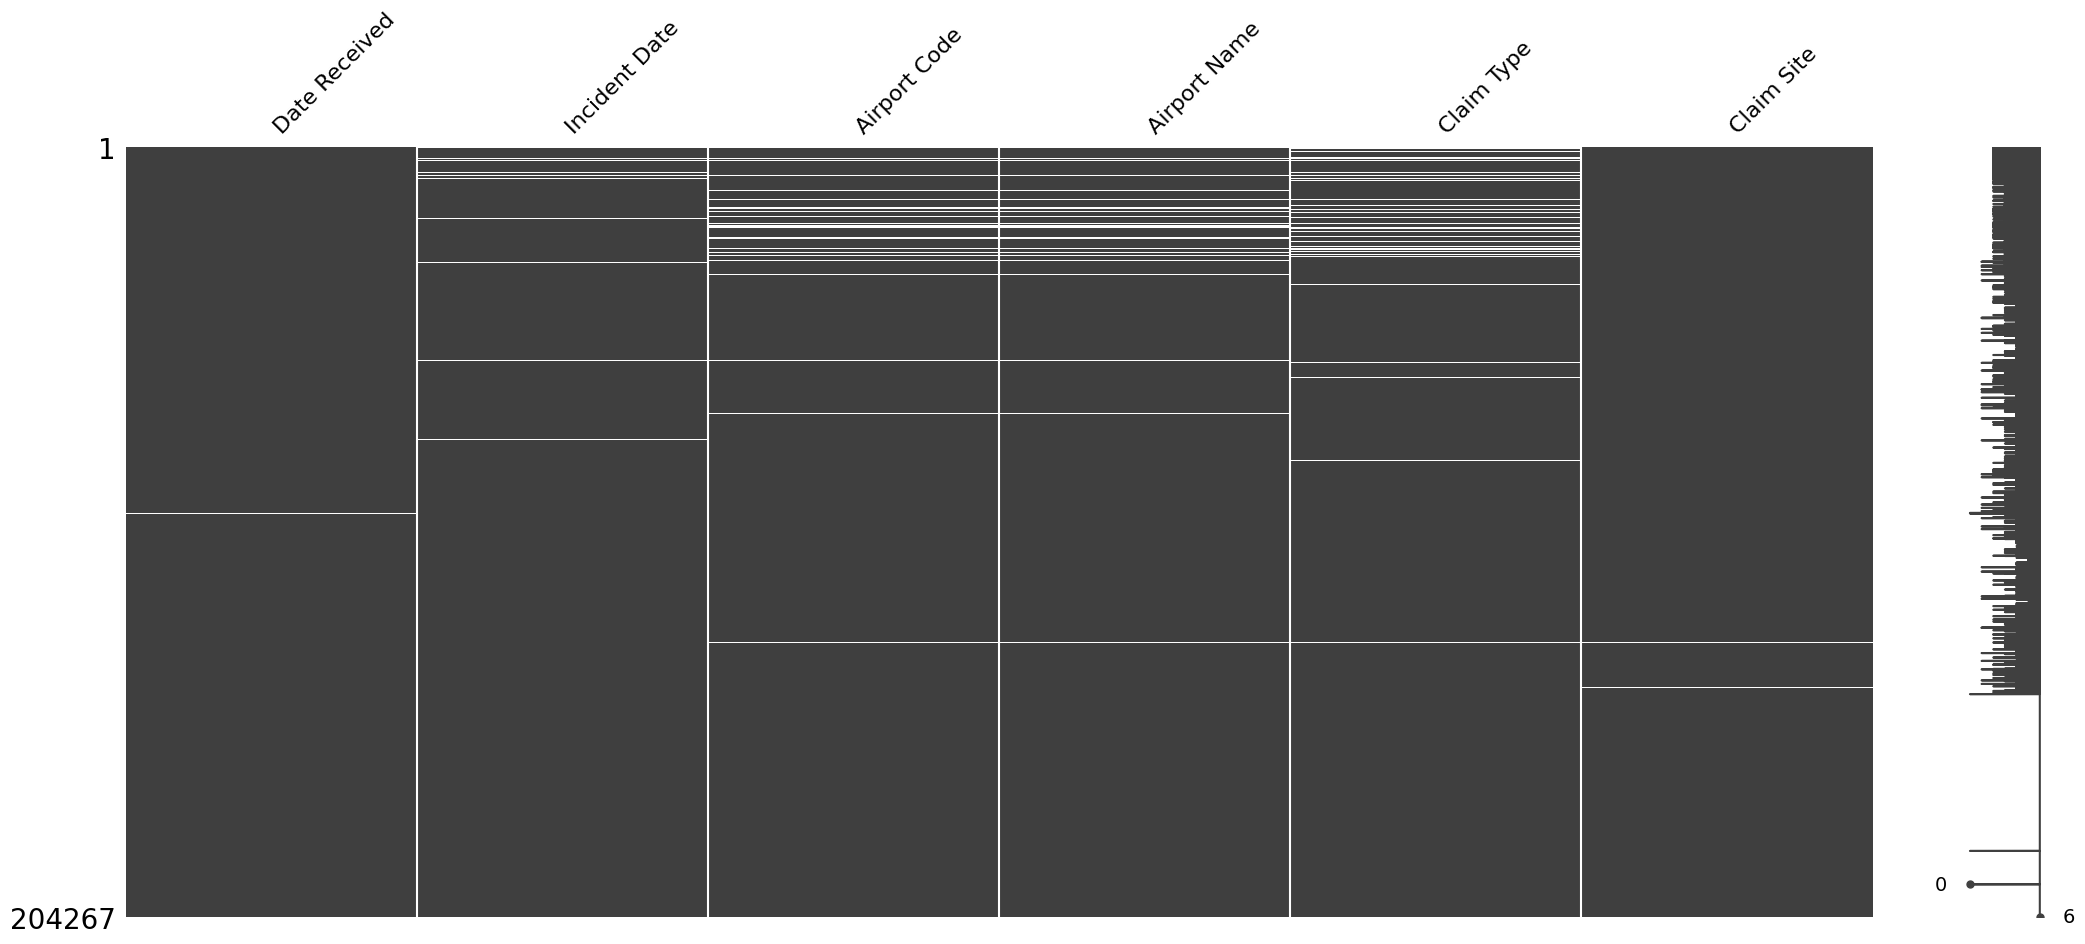

In [10]:
# Sebaran missing value dalam data

import missingno
missingno.matrix(df)

Beberapa kolom yang tidak relevan dalam analisis telah dihapus, sehingga kolom-kolom yang masih memiliki missing value yaitu Date Received, Incident Date, Airport Code, Airport Name, Claim Type, dan Claim Site. Berdasarkan persentase missing value dan missingno di atas, dapat diperoleh informasi secara garis besar :

* *Missing value* di kolom `Airport Code`, `Airport Name`, dan `Claim Type` memiliki proporsi yang paling besar di antara yang lainnya, dimana *missing value* di kolom `Airport Code`, `Airport Name` sebesar 4.2% dan di kolom `Claim Type` sebesar 3.9%.

Terdapat dua cara dalam menangani *missing value*, yaitu :
* Cara pertama dengan menghapus baris/kolom yang berisi *missing value*.
* Cara kedua dengan mengisi data yang hilang. Ada beberapa metode yang bisa digunakan untuk mengisi missing value, cara yang paling baik adalah dengan mengisi data yang hilang dengan nilai sebenarnya, atau sedekat mungkin dengan nilai asli. Jika masih ada kolom yang tidak bisa diisi, bisa diisi dengan angka *mean, median* atau *modus*. Menghapus data akan menjadi opsi terakhir.


Setelah melihat informasi mengenai anomali-anomali yang ada pada dataset secara garis besar, langkah selanjutnya dapat dilakukan penanganan terhadap anomali-anomali yang ada secara lebih mendalam.

# Date Received dan Incident Date 
Kolom Date Received dan Incident Date sama sama berisikan waktu yang spesifik. Date Received memiliki missing value sebesar 0.13% dan Incident Date sebesar 1.07%.

In [11]:
# Jumlah missing value pada kolom Date Received dan Incident Date
df[['Date Received','Incident Date']].isna().sum()

Date Received     263
Incident Date    2183
dtype: int64

Untuk penanganan missing value pada kedua kolom tersebut dapat dilakukan penghapusan karena proporsinya yang kecil serta tidak ada cara lain yang cukup meyakinkan untuk menambahkan value yang baru. Hal ini terjadi karena kedua kolom tersebut berisikan waktu yang spesifik.

In [12]:
# Menghapus Missing Value pada kolom Date Received dan Incident Date

df.dropna(subset=['Date Received','Incident Date'],inplace=True)

In [13]:
df.isna().sum()

Date Received       0
Incident Date       0
Airport Code     7030
Airport Name     7030
Claim Type       6403
Claim Site        532
dtype: int64

Setelah menangani missing value, pada pengecekan lebih lanjut tipe data pada kolom `Date Received` dan `Incident Date` adalah object, karena tidak sesuai dengan value yang ada di dalamnya sehingga perlu diubah terlebih dahulu menjadi tipe data date time.

In [14]:
# Mengubah tipe data Date Received dan Incident Date menjadi date time

df['Date Received'] = pd.to_datetime(df['Date Received'])
df['Incident Date'] = pd.to_datetime(df['Incident Date'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201945 entries, 0 to 204266
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date Received  201945 non-null  datetime64[ns]
 1   Incident Date  201781 non-null  datetime64[ns]
 2   Airport Code   194915 non-null  object        
 3   Airport Name   194915 non-null  object        
 4   Claim Type     195542 non-null  object        
 5   Claim Site     201413 non-null  object        
dtypes: datetime64[ns](2), object(4)
memory usage: 10.8+ MB


Pada kolom Incident Date terdapat error pada penulisan beberapa value sehingga tidak dapat diubah ke dalam tipe data date time. Value tersebut tidak bisa diisi atau diganti dengan value yang lain, oleh karena itu data tersebut diubah menjadi data kosong dan kemudian dilakukan penghapusan kembali.

In [15]:
# Mengecek missing value pada Incident Date

df['Incident Date'].isnull().sum()

164

In [16]:
# Menghapus missing value pada Incident Date

df.dropna(subset=['Incident Date'],inplace=True)

In [17]:
df['Incident Date'].isna().sum()

0

Setelah menangani missing value dan juga mengubah tipe data menjadi date time, dilakukan pengecekan lebih mendalam terkait data pada kolom Date Received dan Incident Date.

In [18]:
# Mengecek tahun dari kolom Date Received

df['Date Received'].dt.year.value_counts().sort_index()

1994        1
1996        1
2000        4
2002      932
2003    21115
2004    29531
2005    24353
2006    18993
2007    18558
2008    16395
2009    12770
2010    10925
2011    10905
2012    10069
2013     9698
2014     8855
2015     8667
2020        1
2025        5
2040        1
2044        1
2055        1
Name: Date Received, dtype: int64

In [19]:
# Mengecek tahun dari kolom Incident Date

df['Incident Date'].dt.year.value_counts().sort_index()

1996        1
2000       14
2001       15
2002     2123
2003    24465
2004    28953
2005    22964
2006    18796
2007    18261
2008    15887
2009    11172
2010    12215
2011    10994
2012     9984
2013     9536
2014     8680
2015     7721
Name: Incident Date, dtype: int64

Dari pengecekan data di atas, diperoleh informasi bahwa terdapat value yang memiliki waktu (tahun) tidak sesuai dengan pernyataan rentang dataset dari tahun 2002 - 2015. Oleh karena itu data tersebut akan dihapus karena proporsi kekeliruan value yang rendah, jarak tahun yang terlalu jauh, serta tidak ada cara sesuai yang dapat menggantikan value-value tersebut.

In [20]:
# Menghilangkan value yang memiliki tahun tidak sesuai dengan rentang tahun 2002 - 2015

df = df[df['Date Received'].dt.year.isin(range(2002,2016))]
df = df[df['Incident Date'].dt.year.isin(range(2002,2016))]


In [21]:
df['Date Received'].dt.year.value_counts().sort_index()

2002      932
2003    21111
2004    29516
2005    24350
2006    18990
2007    18555
2008    16393
2009    12770
2010    10925
2011    10905
2012    10069
2013     9698
2014     8855
2015     8667
Name: Date Received, dtype: int64

In [22]:
df['Incident Date'].dt.year.value_counts().sort_index()

2002     2123
2003    24463
2004    28952
2005    22956
2006    18793
2007    18260
2008    15887
2009    11172
2010    12215
2011    10994
2012     9984
2013     9536
2014     8680
2015     7721
Name: Incident Date, dtype: int64

Kolom Date Received berisi waktu saat pengajuan klaim dibuat dan kolom Incident Date berisikan waktu saat terjadinya kejadian, sehingga waktu dalam Date Received tentunya harus lebih baru daripada waktu Incident Date. Namun, setelah pengecekan lebih lanjut terdapat beberapa value yang tidak sesuai, dimana waktu dari Incident date lebih baru daripada waktu Date Received. Oleh karena itu, data tersebut harus dihapus karena tidak bisa diubah atau digantikan dengan value yang lain karena berkaitan dengan waktu yang spesifik.

In [23]:
# Menampilkan data Incident Date yang lebih baru daripada Date Received

df.loc[df['Incident Date'] > df['Date Received']]

,Date Received,Incident Date,Airport Code,Airport Name,Claim Type,Claim Site
0,2002-01-04,2002-12-12 00:00:00,EWR,Newark International Airport,Property Damage,Checkpoint
1,2002-02-02,2004-01-16 00:00:00,SEA,Seattle-Tacoma International,Property Damage,Checked Baggage
2,2002-02-04,2003-11-26 00:00:00,STL,Lambert St. Louis International,Property Damage,Checked Baggage
3,2002-02-07,2003-01-06 00:00:00,MIA,Miami International Airport,Property Damage,Checkpoint
4,2002-02-18,2005-02-05 00:00:00,MCO,Orlando International Airport,Property Damage,Checkpoint
...,...,...,...,...,...,...
185745,2013-11-16,2013-11-16 11:22:00,EWR,Newark International Airport,Passenger Property Loss,Checkpoint
185827,2013-11-20,2013-11-20 06:00:00,LAX,Los Angeles International Airport,Property Damage,Checked Baggage
186051,2013-12-02,2013-12-02 07:00:00,DFW,Dallas-Fort Worth International Airport,Property Damage,Checked Baggage
186298,2013-12-11,2013-12-11 12:20:00,-,-,Property Damage,Checkpoint


In [24]:
# Menghapus data Incident Date yang lebih baru daripada Date Received

index_date = df[df['Incident Date'] > df['Date Received']].index
df.drop(index=index_date, inplace=True)
df.reset_index(drop=True, inplace=True)
display(df.head(), df.tail())


,Date Received,Incident Date,Airport Code,Airport Name,Claim Type,Claim Site
0,2002-06-20,2002-05-09,BWI,Baltimore/Washington Intl Thurgood Marshall,NaN,Checkpoint
1,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,Property Damage,Checkpoint
2,2002-06-25,2002-05-04,ATL,Hartsfield-Jackson Atlanta International Airport,Passenger Property Loss,Checkpoint
3,2002-07-08,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,NaN,Checkpoint
4,2002-07-08,2002-06-04,BWI,Baltimore/Washington Intl Thurgood Marshall,NaN,Other


,Date Received,Incident Date,Airport Code,Airport Name,Claim Type,Claim Site
200021,2015-11-20,2015-10-16,-,-,Property Damage,Checked Baggage
200022,2015-12-17,2015-12-02,-,-,Property Damage,Checked Baggage
200023,2015-12-22,2015-12-20,-,-,Passenger Property Loss,Checked Baggage
200024,2015-12-30,2015-12-28,-,-,Passenger Property Loss,Checked Baggage
200025,2015-12-31,2015-11-23,-,-,Passenger Property Loss,Checkpoint


# Airport Code dan Airport Name
Selanjutnya dilakukan pengecekan pada kolom Airport Code dan Airport Name, dimana kedua kolom ini saling berhubungan. Kedua kolom tersebut berisikan data yang bersifat kategorikal. Untuk menangani missing value dari kedua kolom tersebut, tidak ada cara yang baik dan cukup meyakinkan untuk mengisi value Airport Code dan Airport Name. Selain itu, kedua kolom tersebut juga memiliki proporsi *missing value* yang kecil. Oleh karena itu, missing value dari kedua kolom tersebut akan dihapus.  

In [25]:
# Jumlah missing value pada kolom Airport Code dan Airport Name
df[['Airport Code','Airport Name']].isna().sum()

Airport Code    6940
Airport Name    6940
dtype: int64

In [26]:
# Menghapus missing value pada kolom Airport Code dan Airport Name

df.dropna(subset=['Airport Code', 'Airport Name'], inplace = True)

In [27]:
# Mengecek kembali missing value setelah dilakukan penghapusan

df[['Airport Code','Airport Name']].isna().sum()

Airport Code    0
Airport Name    0
dtype: int64

Berdasarkan data di atas dapat dilihat bahwa kolom Airport Code dan Airport Name sudah tidak lagi memiliki missing value. Langkah selanjutkan akan dilakukan pengecekan lebih lanjut terkait data pada Airport Code dan Airport Name. 

In [28]:
# Menampilkan Airport Code yang memiliki Airport Name lebih dari satu (Duplikat)

Ap_code_name = df.groupby("Airport Code")['Airport Name'].nunique().sort_values(ascending=False)
print(df[df['Airport Code'].isin(Ap_code_name[Ap_code_name > 1].index)].groupby("Airport Code")['Airport Name'].unique())
print(len(df[df['Airport Code'].isin(Ap_code_name[Ap_code_name > 1].index)].groupby('Airport Code')['Airport Name'].nunique()))

Airport Code
BOS          [Boston (Logan) International Airport, Boston (Logan) International Airport ]
BUR                                                                  [Bob Hope, Bob Hope ]
BZN                            [Gallatin Field, Bozeman Yellowstone International Airport]
DEN                          [Denver International Airport, Denver International Airport ]
DFW    [Dallas-Fort Worth International Airport, Dallas-Fort Worth International Airport ]
DUJ                                    [Dubois Jefferson County, Dubois Jefferson County ]
EAR                                [Kearney Municipal Airport, Kearney Municipal Airport ]
HIB                                [Chisolm-Hibbing Municipal, Chisolm-Hibbing Municipal ]
INL                                            [Falls International, Falls International ]
JHM                                                    [Kapalua Airport, Kapalua Airport ]
LAX                [Los Angeles International Airport, Los Angeles Internatio

Berdasarkan data di atas, dapat dilihat bahwa terdapat 20 value dari Airport Code yang memiliki Airport Name lebih dari satu. Selain itu juga terdapat spasi yang berlebih pada penulisan beberapa Airport Name. Airport Code merupakan kode unik untuk setiap Airport Name. Pada Airport Code PNS terdapat terdapat Airport Name yang berbeda karena penulisan yang berbeda yaitu Pensacola Regional yang seharusnya adalah Pensacola International Airport. Oleh karena itu value Pensacola Regional tersebut harus diganti. Sedangkan pada Airport code BZN terdapat Airport Name Gallatin Field. Value tersebut tidak perlu diganti karena Gallatin Field merupakan nama lain dari bandara Bozeman Yellowstone International Airport yang saat itu belum dilakukan penggantian nama.  

In [29]:
# Menghilangkan spasi berlebih

df['Airport Code'] = df['Airport Code'].str.strip()
df['Airport Name'] = df['Airport Name'].str.strip()


In [30]:
# Mengubah value Pensacola Regional

df['Airport Name'] = df['Airport Name'].replace(to_replace= 'Pensacola Regional', value= 'Pensacola International Airport')

Pada kolom Airport Code dan Airport Name terdapat value berupa (-) sebanyak 441. Value tersebut tidak dapat diganti dengan value yang lain karena dapat menimbulkan bias, oleh karena itu harus dilakukan penghapusan.

In [31]:
# Menampilkan data yang memiliki value (-) pada Airport Code dan Airport Name

df.loc[df["Airport Code"] == "-"]

,Date Received,Incident Date,Airport Code,Airport Name,Claim Type,Claim Site
141265,2010-01-19,2010-01-19 00:00:00,-,-,Personal Injury,Checkpoint
141504,2010-01-28,2010-01-04 13:00:00,-,-,Property Damage,-
141661,2010-02-03,2010-01-23 19:00:00,-,-,Passenger Property Loss,Checked Baggage
141663,2010-02-04,2010-02-04 00:00:00,-,-,-,-
141664,2010-02-04,2010-01-02 00:00:00,-,-,-,-
...,...,...,...,...,...,...
200021,2015-11-20,2015-10-16 00:00:00,-,-,Property Damage,Checked Baggage
200022,2015-12-17,2015-12-02 00:00:00,-,-,Property Damage,Checked Baggage
200023,2015-12-22,2015-12-20 00:00:00,-,-,Passenger Property Loss,Checked Baggage
200024,2015-12-30,2015-12-28 00:00:00,-,-,Passenger Property Loss,Checked Baggage


In [32]:
# Menghilangkan data yang memiliki value (-) pada Airport Code dan Airport Name

df_baru = df.loc[df["Airport Name"] != "-"]
df = df_baru

Selain (-), pada kolom Airport Name juga terdapat value berupa *Unspecified Personal  Injury* dan *Non TSA Airport (motor vehicle)*. Padahal seharusnya kolom Airport Name hanya berisikan nama nama bandara. Baik value *Unspecified Personal  Injury* dan *Non TSA Airport (motor vehicle)*, keduanya tidak bisa diganti dengan value nama bandara tertentu karena akan menimbulkan bias saat melakukan analisis nantinya. Oleh karena itu data data yang memiliki value tersebut akan dihapus.

In [33]:
# Menampilkan data yang memiliki value Unspecified Personal Injury pada Airport Name

df.loc[df["Airport Name"] == "Unspecified Personal Injury"]

,Date Received,Incident Date,Airport Code,Airport Name,Claim Type,Claim Site
164793,2012-03-05,2010-03-09 00:00:00,ZZZ,Unspecified Personal Injury,Personal Injury,Other
168476,2012-07-17,2012-05-14 00:00:00,ZZZ,Unspecified Personal Injury,Personal Injury,Motor Vehicle
171621,2012-11-09,2012-10-15 00:00:00,ZZZ,Unspecified Personal Injury,Personal Injury,Other
176104,2013-05-01,2013-03-01 21:40:00,ZZZ,Unspecified Personal Injury,Personal Injury,Checkpoint
177227,2013-06-12,2012-06-09 02:00:00,ZZZ,Unspecified Personal Injury,Personal Injury,Other
178860,2013-08-07,2013-08-02 00:00:00,ZZZ,Unspecified Personal Injury,Personal Injury,Motor Vehicle
180863,2013-10-22,2013-03-08 00:00:00,ZZZ,Unspecified Personal Injury,Personal Injury,Motor Vehicle
180928,2013-10-25,2013-09-26 00:00:00,ZZZ,Unspecified Personal Injury,Personal Injury,Motor Vehicle
181619,2013-11-21,2013-11-09 09:00:00,ZZZ,Unspecified Personal Injury,Complaint,Other
182595,2014-02-03,2012-02-04 00:00:00,ZZZ,Unspecified Personal Injury,Personal Injury,Other


In [34]:
# Menghilangkan data yang memiliki value Unspecified Personal Injury pada Airport Name

df_baru = df.loc[df["Airport Name"] != "Unspecified Personal Injury"]
df = df_baru

In [35]:
# Menampilkan data yang memiliki value Non TSA Airport (motor vehicle) pada Airport Name

df.loc[df["Airport Name"] == "Non TSA Airport (motor vehicle)"]

,Date Received,Incident Date,Airport Code,Airport Name,Claim Type,Claim Site
36940,2004-06-29,2004-05-26,ZZX,Non TSA Airport (motor vehicle),Property Damage,Checked Baggage
66233,2005-07-28,2005-07-11,ZZX,Non TSA Airport (motor vehicle),Property Damage,Checked Baggage
81238,2006-04-24,2006-02-24,ZZX,Non TSA Airport (motor vehicle),Property Damage,Other
103497,2007-07-09,2007-05-30,ZZX,Non TSA Airport (motor vehicle),Motor Vehicle,Motor Vehicle
104731,2007-08-01,2007-06-07,ZZX,Non TSA Airport (motor vehicle),Motor Vehicle,Motor Vehicle
...,...,...,...,...,...,...
199962,2015-09-29,2015-09-22,ZZX,Non TSA Airport (motor vehicle),Motor Vehicle,Motor Vehicle
199963,2015-10-13,2015-07-16,ZZX,Non TSA Airport (motor vehicle),Motor Vehicle,Motor Vehicle
199964,2015-10-20,2015-09-29,ZZX,Non TSA Airport (motor vehicle),Motor Vehicle,Motor Vehicle
199965,2015-12-08,2014-12-03,ZZX,Non TSA Airport (motor vehicle),Motor Vehicle,Motor Vehicle


In [36]:
# Menghilangkan data yang memiliki value Non TSA Airport (motor vehicle) pada Airport Name

df_baru = df.loc[df["Airport Name"] != "Non TSA Airport (motor vehicle)"]
df = df_baru

# Claim Type dan Claim Site
Claim Type dan Claim Site merupakan data kategorikal. Dalam kolom *Claim Type* dan kolom *Claim Site*, keduanya memiliki value *Other*. Oleh karena itu, untuk menangani missing value pada data tersebut dapat dilakukan dengan mengisi *missing value* tersebut menjadi *Other*. 

In [37]:
# Jumlah missing value pada Claim Type dan Claim Site

df[['Claim Type', 'Claim Site']].isna().sum()

Claim Type    5381
Claim Site     341
dtype: int64

In [38]:
# Mengubah missing value pada kolom Claim Type dan Claim Site dengan Other

df[['Claim Type', 'Claim Site']] = df[['Claim Type', 'Claim Site']].fillna('Other')

In [39]:
# Jumlah missing value setelah dilakukan pengubahan missing value menjadi Other

df[['Claim Type', 'Claim Site']].isna().sum()

Claim Type    0
Claim Site    0
dtype: int64

Berdasarkan informasi di atas, kolom *Claim Type* dan *Claim Site* sudah tidak lagi memiliki missing value. Setelah dilakukan pengecekan lebih lanjut, pada kolom Claim Type dan Claim Site terdapat beberapa value (-). Value tersebut akan diubah juga menjadi kategori *Other*.

* Claim Type

In [40]:
# Jumlah setiap value pada kolom Claim Type

df['Claim Type'].value_counts()

Passenger Property Loss    113569
Property Damage             70757
Other                        5381
Personal Injury              1372
Employee Loss (MPCECA)        460
Passenger Theft               446
-                             196
Motor Vehicle                 171
Complaint                      44
Wrongful Death                  3
Compliment                      2
Bus Terminal                    1
Name: Claim Type, dtype: int64

In [41]:
# Mengubah value - pada kolom Claim Type menjadi Other

df.loc[df['Claim Type'] == '-', 'Claim Type'] = 'Other'

In [42]:
# Jumlah setiap value pada kolom Claim Type setelah dilakukan pengubahan

df['Claim Type'].value_counts()

Passenger Property Loss    113569
Property Damage             70757
Other                        5577
Personal Injury              1372
Employee Loss (MPCECA)        460
Passenger Theft               446
Motor Vehicle                 171
Complaint                      44
Wrongful Death                  3
Compliment                      2
Bus Terminal                    1
Name: Claim Type, dtype: int64

* Claim Site

In [43]:
# Jumlah setiap value pada kolom Claim Type

df['Claim Site'].value_counts()

Checked Baggage    152237
Checkpoint          38133
Other                1654
Motor Vehicle         195
-                     168
Bus Station            15
Name: Claim Site, dtype: int64

In [44]:
# Mengubah value - pada kolom Claim Site menjadi Other

df.loc[df['Claim Site'] == '-', 'Claim Site'] = 'Other'

In [45]:
# Jumlah setiap value pada kolom Claim Site setelah dilakukan pengubahan

df['Claim Site'].value_counts()

Checked Baggage    152237
Checkpoint          38133
Other                1822
Motor Vehicle         195
Bus Station            15
Name: Claim Site, dtype: int64

In [46]:
# Semua kolom yang akan dipakai dalam analisis sudah tidak memiliki missing value

df.isna().sum()


Date Received    0
Incident Date    0
Airport Code     0
Airport Name     0
Claim Type       0
Claim Site       0
dtype: int64

# Cleaned Data
Tahapan Understanding dan Cleaning Data sudah selesai, berikut informasi umum dari data yang sudah dibersihkan.

In [47]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                    data=listItem)
print(df.shape)
dfDesc

(192402, 6)


,dataFeatures,dataType,null,unique,uniqueSample
0,Date Received,datetime64[ns],0,3892,"[2015-02-23T00:00:00.000000000, 2010-04-29T00:00:00.000000000]"
1,Incident Date,datetime64[ns],0,26029,"[2011-04-30T09:00:00.000000000, 2009-10-22T21:27:00.000000000]"
2,Airport Code,object,0,462,"[TRI, JST]"
3,Airport Name,object,0,463,"[Tucson International, Detroit Metropolitan Wayne County Airport]"
4,Claim Type,object,0,11,"[Other, Complaint]"
5,Claim Site,object,0,5,"[Other, Motor Vehicle]"


Sebelum proses data cleaning, dataset tsa_claims secara keseluruhan memiliki 13 kolom dan 204267 baris. Setelah melalui proses data cleaning, sekarang dataset memiliki 6 kolom dan 192402 baris. Sekitar 11 ribu lebih data telah dihapus, baik data kosong, ataupun data yang tidak relevan pada kolom serta tidak dapat diganti dengan value lain.  

#  Data Analysis
Proses data cleaning sudah seselai dilakukan. Selanjutkan data yang sudah bersih akan masuk ke tahap analisis. 

In [48]:
# Melihat jumlah airport dan jumlah klaim yang diajukan

jumlah_airport = df['Airport Code'].value_counts()
print(f'''Jumlah Airport : {jumlah_airport.count()}, 
Jumlah Klaim : {jumlah_airport.sum()}''')

Jumlah Airport : 462, 
Jumlah Klaim : 192402


Terdapat 462 airport dengan jumlah klaim yang diajukan sebanyak 192402. Analisis data akan dilakukan dengan melihat karakteristik :
* Perkembangan jumlah klaim yang diajukan setiap tahun (2002 - 2015) 
* Bandara yang memiliki jumlah klaim paling banyak
* Jumlah klaim yang diajukan pada setiap bandara
* Jenis klaim apa saja yang paling banyak dilaporkan
* Titik lokasi yang paling banyak menerima laporan klaim

# Perkembangan jumlah klaim yang diajukan penumpang dari tahun 2002 - 2015

In [49]:
df['Year'] = df['Date Received'].dt.year
df.head()

,Date Received,Incident Date,Airport Code,Airport Name,Claim Type,Claim Site,Year
0,2002-06-20,2002-05-09,BWI,Baltimore/Washington Intl Thurgood Marshall,Other,Checkpoint,2002
1,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,Property Damage,Checkpoint,2002
2,2002-06-25,2002-05-04,ATL,Hartsfield-Jackson Atlanta International Airport,Passenger Property Loss,Checkpoint,2002
3,2002-07-08,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Other,Checkpoint,2002
4,2002-07-08,2002-06-04,BWI,Baltimore/Washington Intl Thurgood Marshall,Other,Other,2002


In [50]:
claim_year = df.groupby('Year', as_index= False)['Airport Code'].count()
claim_year

,Year,Airport Code
0,2002,837
1,2003,17287
2,2004,27245
3,2005,23480
4,2006,18476
5,2007,18191
6,2008,16119
7,2009,12538
8,2010,10720
9,2011,10735


C:\Users\haqib\AppData\Local\Temp\ipykernel_27580\1019148204.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


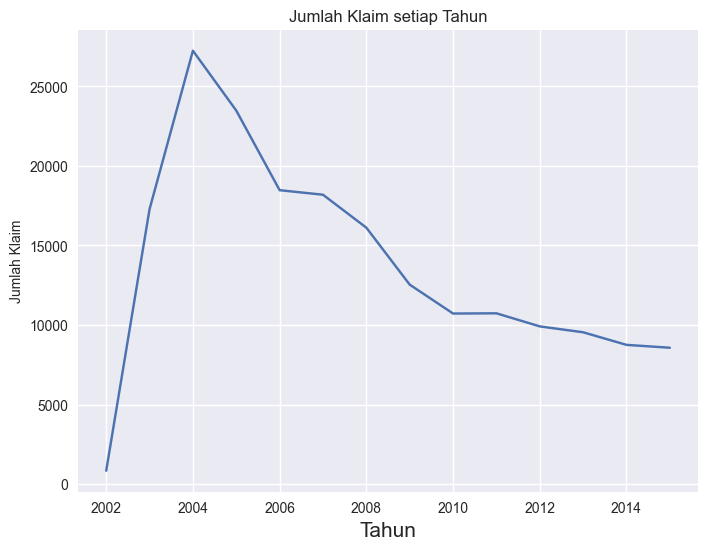

In [51]:
x = claim_year['Year']
y = claim_year['Airport Code']

plt.style.use('seaborn')
plt.figure(figsize=(8,6))
plt.plot(x, y)
plt.title('Jumlah Klaim setiap Tahun')
plt.xlabel('Tahun', size=15)
plt.ylabel('Jumlah Klaim')
plt.show()

Berdasarkan grafik di atas, terlihat bahwa jumlah klaim yang paling sedikit terjadi pada tahun 2002. Kemudian pada tahun 2004 terjadi lonjakan yang tajam dan merupakan jumlah klaim tertinggi dari rentang tahun 2002 sampai 2015. Namun setelah tahun 2004, jumlah klaim cenderung menurun.


# Bandara dengan Jumlah Klaim Terbanyak

In [52]:
claim_by_airport = df.groupby('Airport Name', as_index= False)['Claim Type'].count()
claim_by_airport.rename(columns = {'Claim Type' : 'Jumlah Klaim'}, inplace= True)
claim_by_airport

,Airport Name,Jumlah Klaim
0,Aberdeen Regional Airport,31
1,Abilene Regional,44
2,Abraham Lincoln Capital Airport; Springfield,20
3,Adak Mitchell Field Airport,1
4,Akron-Canton Regional,233
...,...,...
458,Yeager; Charleston,79
459,Yellowstone,9
460,Yellowstone Regional,11
461,Youngstown-Warren Regional,24


In [53]:
claim_by_airport.describe()

,Jumlah Klaim
count,463.000000
mean,415.555076
std,1162.277409
min,1.000000
25%,7.000000
50%,33.000000
75%,180.000000
max,9451.000000


<Axes: xlabel='Jumlah Klaim'>

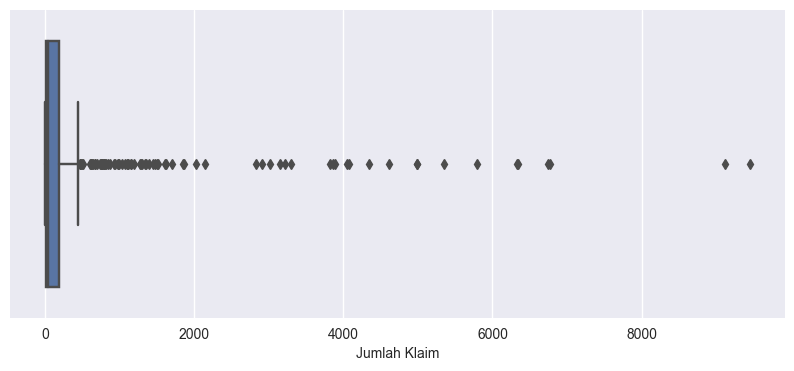

In [54]:
plt.figure(figsize = (10,4))
sns.boxplot(x = claim_by_airport['Jumlah Klaim'])

In [55]:
Q1 = claim_by_airport['Jumlah Klaim'].describe()['25%']
Q3 = claim_by_airport['Jumlah Klaim'].describe()['75%']
IQR = Q3 - Q1
upper = Q3 + 1.5*IQR

jumlah_outlier = claim_by_airport[claim_by_airport['Jumlah Klaim']> upper]['Airport Name'].count()
jumlah_outlier

78

In [56]:
# Uji Distribusi Normal pada Jumlah Klaim
from scipy.stats import kstest
stat, pval = kstest(claim_by_airport['Jumlah Klaim'], 'norm')
print(kstest(claim_by_airport['Jumlah Klaim'], 'norm'))
if pval<=0.05:
    print('Distribusi tidak normal') #Ha
else: 
    print('distribusi normal') #Ho 

KstestResult(statistic=0.9081353972094882, pvalue=0.0, statistic_location=2, statistic_sign=-1)
Distribusi tidak normal


Berdasarkan uji distribusi normal di atas, terlihat bahwa data dari Jumlah Klaim tidak terdistribusi normal. Data-data tersebut juga memiliki standar deviasi yang sangat besar. Hal ini terjadi karena banyaknya *outlier* yang dapat dilihat dari diagram di atas. Terdapat 78 bandara yang termasuk ke dalam outlier. Data bandara yang termasuk outlier tersebut tidak akan dihapus karena tujuan dilakukannya analisis ini salah satunya adalah untuk mengetahui bandara yang paling banyak menerima klaim dari penumpang. Oleh karena itu bandara-bandara yang termasuk ke dalam outlier tersebut akan dianalisis lebih lanjut.

In [57]:
# Jumlah airport yang termasuk outlier
total_airport = claim_by_airport[claim_by_airport['Jumlah Klaim']> upper]

# Rata-rata jumlah klaim
total_airport_mean = total_airport['Jumlah Klaim'].mean()

In [58]:
# Airport dengan jumlah klaim di atas rata-rata
t_airport = total_airport[total_airport['Jumlah Klaim'] > total_airport_mean].sort_values('Jumlah Klaim', ascending = False)
t_airport


,Airport Name,Jumlah Klaim
239,Los Angeles International Airport,9451
190,John F. Kennedy International,9122
295,Newark International Airport,6769
65,Chicago O'Hare International Airport,6738
267,Miami International Airport,6336
310,Orlando International Airport,6323
164,Hartsfield-Jackson Atlanta International Airport,5792
382,Seattle-Tacoma International,5344
327,Phoenix Sky Harbor International,4994
253,McCarran International,4991


In [59]:
t_airport.describe()

,Jumlah Klaim
count,23.000000
mean,4910.391304
std,1856.291801
min,2831.000000
25%,3561.500000
50%,4344.000000
75%,6057.500000
max,9451.000000


C:\Users\haqib\AppData\Local\Temp\ipykernel_27580\1300669279.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


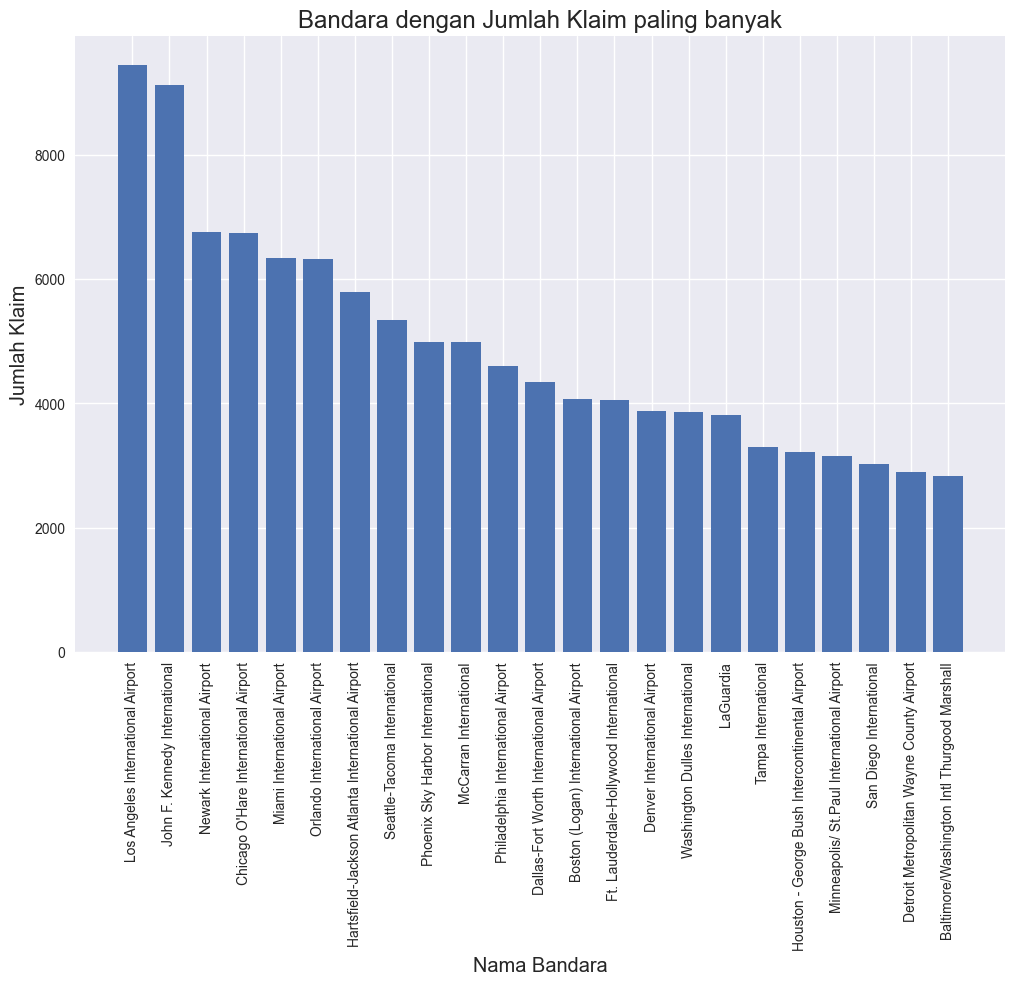

In [60]:
plt.style.use('seaborn')
plt.figure(figsize=(12, 8))
plt.title('Bandara dengan Jumlah Klaim paling banyak', size='xx-large') 
plt.bar(t_airport['Airport Name'], t_airport['Jumlah Klaim'])
plt.xlabel('Nama Bandara', size='x-large')
plt.ylabel('Jumlah Klaim', size='x-large')
plt.xticks(rotation='vertical')
plt.show()

Berdasarkan grafik di atas, terlihat bahwa bandara yang paling banyak menerima klaim adalah bandara dengan kode LAX (Los Angeles International Airport) yaitu sebanyak 9451 klaim, kemudian diikuti oleh bandara JFK (John F. Kennedy Airport) dengan jumlah klaim sebanyak 9122. Berdasarkan data yang dilansir dari [Wikipedia](https://en.wikipedia.org/wiki/List_of_the_busiest_airports_in_the_United_States), Los Angeles International Airport dan John F. Kennedy Airport merupakan bandara yang termasuk ke dalam bandara tersibuk di Amerika Serikat. Begitupun dengan mayoritas bandara-bandara yang ada pada grafik juga termasuk ke dalam *list* bandara tersibuk di Amerika Serikat. Oleh karena itu, wajar jika bandara-bandara tersebut memiliki jumlah klaim yang tinggi karena tingginya arus lalu lintas penumpang.   

# Jenis Klaim yang Paling Banyak Dilaporkan
Setelah melakukan analisis bandara yang paling banyak menerima klaim, selanjutnya akan dianalisis jenis klaim yang paling banyak dilaporkan oleh penumpang di bandara.

In [61]:
df['Claim Type'].value_counts()

Passenger Property Loss    113569
Property Damage             70757
Other                        5577
Personal Injury              1372
Employee Loss (MPCECA)        460
Passenger Theft               446
Motor Vehicle                 171
Complaint                      44
Wrongful Death                  3
Compliment                      2
Bus Terminal                    1
Name: Claim Type, dtype: int64

In [62]:
claim_type = df.groupby('Claim Type', as_index=False)['Claim Type'].value_counts()
claim_type.rename(columns = {'count' : 'Frequency'}, inplace= True)
claim_type

,Claim Type,Frequency
0,Bus Terminal,1
1,Complaint,44
2,Compliment,2
3,Employee Loss (MPCECA),460
4,Motor Vehicle,171
5,Other,5577
6,Passenger Property Loss,113569
7,Passenger Theft,446
8,Personal Injury,1372
9,Property Damage,70757


In [63]:
claim_baru = claim_type.sort_values("Frequency", ascending=False).reset_index(drop=True)
claim1 = claim_baru[0:3]
claim2 = claim_baru[3:7]
claim3 = claim_baru[7:11]

C:\Users\haqib\AppData\Local\Temp\ipykernel_27580\1069740274.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


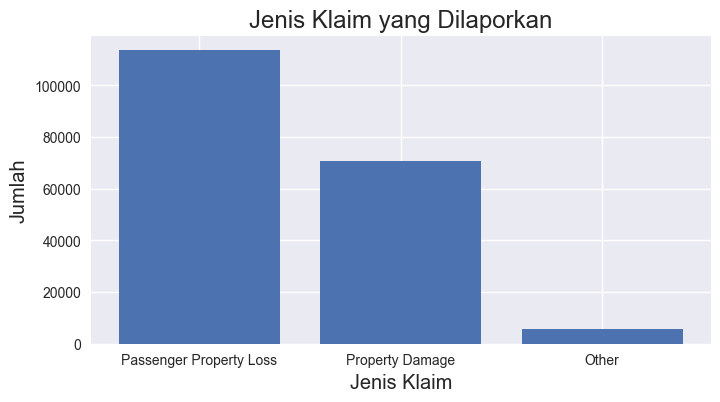

In [64]:
plt.style.use('seaborn')
plt.figure(figsize=(8,4))
plt.title('Jenis Klaim yang Dilaporkan', size='xx-large') 
plt.bar(claim1['Claim Type'], claim1['Frequency'])
plt.xlabel('Jenis Klaim', size='x-large')
plt.ylabel('Jumlah', size='x-large')
plt.show()

C:\Users\haqib\AppData\Local\Temp\ipykernel_27580\3136774885.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


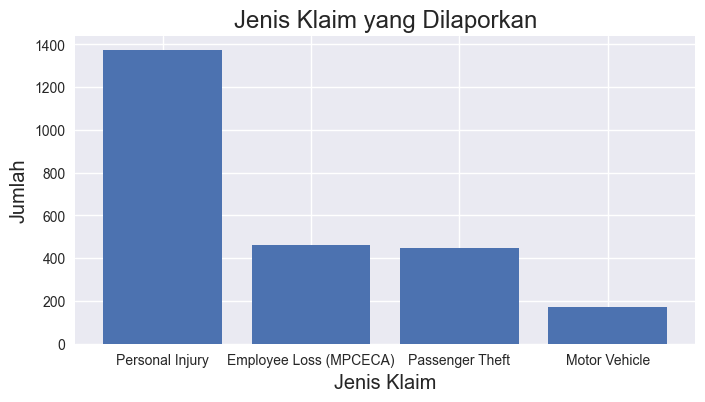

In [65]:
plt.style.use('seaborn')
plt.figure(figsize=(8,4))
plt.title('Jenis Klaim yang Dilaporkan', size='xx-large') 
plt.bar(claim2['Claim Type'], claim2['Frequency'])
plt.xlabel('Jenis Klaim', size='x-large')
plt.ylabel('Jumlah', size='x-large')
plt.show()

C:\Users\haqib\AppData\Local\Temp\ipykernel_27580\1459890371.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


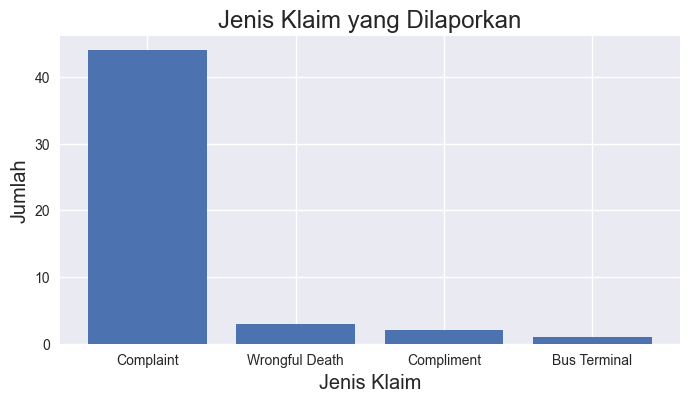

In [66]:
plt.style.use('seaborn')
plt.figure(figsize=(8,4))
plt.title('Jenis Klaim yang Dilaporkan', size='xx-large') 
plt.bar(claim3['Claim Type'], claim3['Frequency'])
plt.xlabel('Jenis Klaim', size='x-large')
plt.ylabel('Jumlah', size='x-large')
plt.show()

Berdasarkan grafik-grafik di atas, dapat diketahui bahwa jenis klaim yang paling banyak dilaporkan oleh penumpang di bandara adalah **Passenger Property Loss** sebanyak 113569 klaim dan **Property Damage** sebanyak 70757 klaim. Data-data tersebut menunjukkan bahwa klaim yang dilaporkan banyak berkaitan dengan barang-barang yang dibawa oleh penumpang.

# Titik Lokasi yang Paling Banyak Menerima Pengajuan Klaim
Setelah mengetahui jenis klaim yang paling banyak dilaporkan, selanjutnya menganalisis titik lokasi di bandara yang paling banyak menerima pengajuan klaim.

In [67]:
df['Claim Site'].value_counts()/df.shape[0]*100

Checked Baggage    79.124437
Checkpoint         19.819441
Other               0.946976
Motor Vehicle       0.101350
Bus Station         0.007796
Name: Claim Site, dtype: float64

In [68]:
claim_site = df.groupby('Claim Site', as_index=False)['Claim Site'].value_counts()
claim_site.rename(columns = {'count' : 'Frequency'}, inplace= True)
claim_site

,Claim Site,Frequency
0,Bus Station,15
1,Checked Baggage,152237
2,Checkpoint,38133
3,Motor Vehicle,195
4,Other,1822


C:\Users\haqib\AppData\Local\Temp\ipykernel_27580\2543840489.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


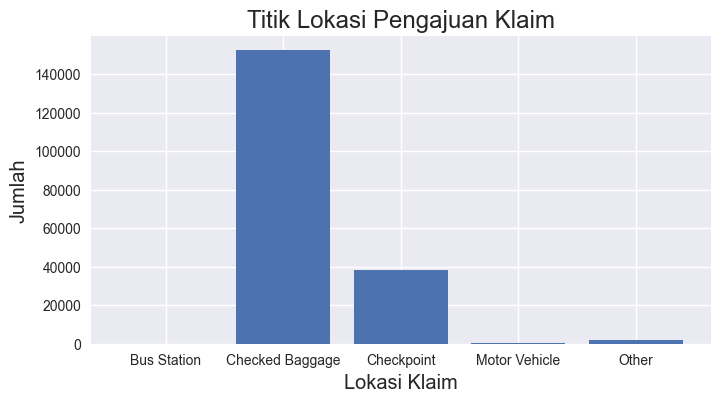

In [69]:
plt.style.use('seaborn')
plt.figure(figsize=(8,4))
plt.title('Titik Lokasi Pengajuan Klaim', size='xx-large') 
plt.bar(claim_site['Claim Site'], claim_site['Frequency'])
plt.xlabel('Lokasi Klaim', size='x-large')
plt.ylabel('Jumlah', size='x-large')
plt.show()

Berdasarkan grafik di atas, terlihat bahwa titik lokasi yang paling banyak menerima klaim dari penumpang adalah **Checked Baggage** (pemeriksaan bagasi) sebesar 79.1% dan Checkpoint (pemeriksaan penumpang) sebesar 19.8%. Kedua lokasi tersebut merupakan tempat dengan tingkat kepadatan dan aktivitas yang cukup tinggi di bandara

**Bandara dengan Jumlah Klaim Terbanyak Berdasarkan *Claim Type***

In [70]:
df_claim_type = pd.crosstab(df['Airport Code'],df['Claim Type'])
df_claim_type['Total']=df_claim_type.sum(axis=1)
top10_claim_type = df_claim_type.sort_values('Total',ascending=False).head(10)
top10_claim_type

Claim Type,Bus Terminal,Complaint,Compliment,Employee Loss (MPCECA),Motor Vehicle,Other,Passenger Property Loss,Passenger Theft,Personal Injury,Property Damage,Wrongful Death,Total
Airport Code,,,,,,,,,,,,
LAX,0,2,0,21,9,366,5738,24,64,3227,0,9451
JFK,0,2,0,13,9,210,6272,17,52,2547,0,9122
EWR,0,2,0,20,5,200,4260,15,36,2231,0,6769
ORD,0,0,0,24,6,202,3636,20,33,2817,0,6738
MIA,0,1,0,19,6,220,3889,13,36,2152,0,6336
MCO,0,2,0,14,4,183,4013,12,51,2044,0,6323
ATL,0,1,0,9,3,132,3530,16,44,2057,0,5792
SEA,0,1,0,16,0,178,3093,19,26,2011,0,5344
PHX,0,4,0,11,0,155,2913,14,48,1849,0,4994


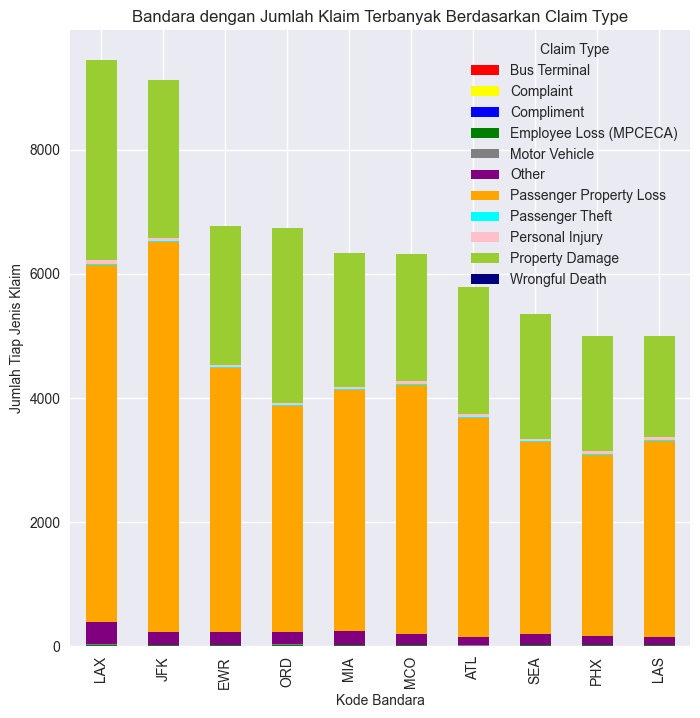

In [71]:
top10_claim_type.drop(columns='Total').plot(kind='bar', stacked=True, figsize=(8,8), title='Bandara dengan Jumlah Klaim Terbanyak Berdasarkan Claim Type', xlabel='Kode Bandara', ylabel='Jumlah Tiap Jenis Klaim', color=('red','yellow','blue','green','grey','purple','orange','cyan','pink','yellowgreen','navy'))
plt.show()


Berdasarkan cross tabulation dan grafik di atas, diperoleh informasi yang sama  dengan analisis sebelumnya bahwa jenis klaim **Passenger Property Loss** dan **Property Damage** merupakan jenis klaim terbanyak pada 10 bandara dengan jumlah klaim terbanyak, dimana bandara LAX (Los Angeles International Airport) yang tertinggi kemudian diikuti bandara JFK (John F. Kennedy International Airport).

**Bandara dengan Jumlah Klaim Terbanyak Berdasarkan *Claim Site***

In [72]:
df_claim_site = pd.crosstab(df['Airport Code'],df['Claim Site'])
df_claim_site['Total']=df_claim_site.sum(axis=1)
top10_claim_site = df_claim_site.sort_values('Total',ascending=False).head(10)
top10_claim_site

Claim Site,Bus Station,Checked Baggage,Checkpoint,Motor Vehicle,Other,Total
Airport Code,,,,,,
LAX,1,7180,2153,8,109,9451
JFK,2,7138,1882,9,91,9122
EWR,2,5548,1138,7,74,6769
ORD,1,5315,1336,8,78,6738
MIA,0,5319,960,5,52,6336
MCO,0,4957,1309,3,54,6323
ATL,1,4454,1287,2,48,5792
SEA,0,4310,991,2,41,5344
PHX,0,4107,843,0,44,4994


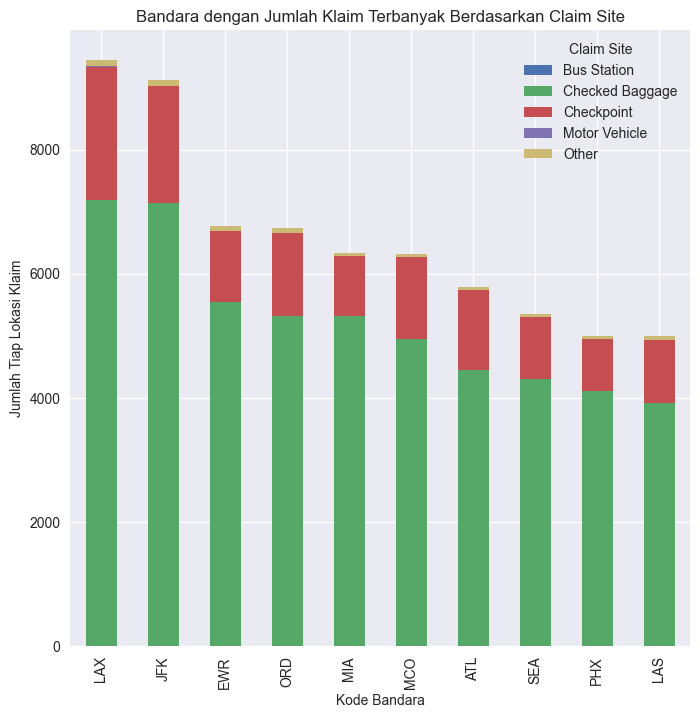

In [73]:
top10_claim_site.drop(columns='Total').plot(kind='bar', stacked=True, figsize=(8,8), title='Bandara dengan Jumlah Klaim Terbanyak Berdasarkan Claim Site', xlabel='Kode Bandara', ylabel='Jumlah Tiap Lokasi Klaim')
plt.show()


Berdasarkan cross tabulation dan grafik di atas, diperoleh informasi yang sama  dengan analisis sebelumnya bahwa titik lokasi klaim **Checked Baggage** dan **Checkpoint** merupakan titik lokasi klaim terbanyak pada 10 bandara dengan jumlah klaim terbanyak, dimana bandara LAX (Los Angeles International Airport) yang tertinggi kemudian diikuti bandara JFK (John F. Kennedy International Airport).

# Kesimpulan dan Rekomendasi
**Kesimpulan**
 
 Berdasarkan analisis yang telah dilakukan, dapat disimpulkan bahwa:
 * Tahun 2002 merupakan tahun dengan jumlah klaim penumpang yang paling sedikit dan tahun 2004 merupakan tahun dengan jumlah klaim tertinggi. Kemudian setelah tahun 2004, jumlah klaim yang diajukan penumpang cenderung menurun.
 * Bandara yang paling banyak menerima klaim dari penumpang adalah Los Angeles International Airport (LAX), kemudian diikuti oleh John F. Kennedy International Airport (JFK). Bandara dengan jumlah klaim di atas rata-rata banyak yang termasuk ke dalam list bandara tersibuk di Amerika Serikat.
 * Jenis klaim yang paling banyak dilaporkan adalah **Passenger Property Loss** dan **Property Damage**. Kedua jenis klaim tersebut juga merupakan jenis klaim terbanyak di bandara-bandara yang memiliki jumlah klaim paling banyak.
 * Titik lokasi yang paling banyak menerima klaim adalah **Checked Baggage** dan **Checkpoint**. Kedua titik lokasi tersebut juga merupakan titik lokasi yang paling banyak menerima laporan klaim di bandara-bandara yang memiliki jumlah klaim paling banyak.

**Rekomendasi**

* Perlu meningkatkan keamanan untuk bandara-bandara yang termasuk ke dalam bandara tersibuk di Amerika Serikat.
* Fokus untuk lebih memperhatikan titik lokasi Checked Baggage dan Checkpoint karena kedua lokasi tersebut tinggi dengan kepadatan dan aktivitas penumpang.
* Perlu menambah petugas keamanan terutama untuk bandara-bandara tersibuk di Amerika Serikat
* Meningkatkan kerja sama dengan maskapai terkait karena untuk titik lokasi Checked Baggage, maskapai juga ikut bertanggung jawab atas kemanan barang bawaan penumpang selama di pesawat 